<font size=6><b>lec12. 군집(Clustring)
* 데이터를 비슷한 것끼리 그룹을 묶는 것
* 데이터의 전반적 특징 파악에 유용
* 답지(target)이 없는 비지도학습(unsupervised 

* ref : https://scikit-learn.org/0.15/auto_examples/cluster/plot_cluster_comparison.html
* ref : https://datascienceschool.net/03%20machine%20learning/16.01%20%EA%B5%B0%EC%A7%91%ED%99%94.html

<img src="https://scikit-learn.org/0.15/_images/plot_cluster_comparison_0011.png">

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# ----------------- 학습 ----------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# ----------------- 평가 ----------------------
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve

# Data Load

In [3]:
df = pd.read_csv("./datasets/iris.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sl      150 non-null    float64
 1   sw      150 non-null    float64
 2   pl      150 non-null    float64
 3   pw      150 non-null    float64
 4   target  150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


* https://scikit-learn.org/stable/modules/clustering.html

# 평가 메트릭스

<table width=600>
<thead>
<tr class="row-odd"><th class="head"><p>Scoring</p></th>
<th class="head"><p>Function</p></th>
<th class="head"><p>Comment</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p><strong>Clustering</strong></p></td>
<td></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘adjusted_mutual_info_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.adjusted_mutual_info_score.html#sklearn.metrics.adjusted_mutual_info_score" title="sklearn.metrics.adjusted_mutual_info_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.adjusted_mutual_info_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘adjusted_rand_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.adjusted_rand_score.html#sklearn.metrics.adjusted_rand_score" title="sklearn.metrics.adjusted_rand_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.adjusted_rand_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘completeness_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.completeness_score.html#sklearn.metrics.completeness_score" title="sklearn.metrics.completeness_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.completeness_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘fowlkes_mallows_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.fowlkes_mallows_score.html#sklearn.metrics.fowlkes_mallows_score" title="sklearn.metrics.fowlkes_mallows_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.fowlkes_mallows_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘homogeneity_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.homogeneity_score.html#sklearn.metrics.homogeneity_score" title="sklearn.metrics.homogeneity_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.homogeneity_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘mutual_info_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mutual_info_score.html#sklearn.metrics.mutual_info_score" title="sklearn.metrics.mutual_info_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mutual_info_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘normalized_mutual_info_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.normalized_mutual_info_score.html#sklearn.metrics.normalized_mutual_info_score" title="sklearn.metrics.normalized_mutual_info_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.normalized_mutual_info_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘rand_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.rand_score.html#sklearn.metrics.rand_score" title="sklearn.metrics.rand_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.rand_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘v_measure_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.v_measure_score.html#sklearn.metrics.v_measure_score" title="sklearn.metrics.v_measure_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.v_measure_score</span></code></a></p></td>
<td></td>
</tr>

</tbody>
</table>

# K-Means
* K개의 헤더를 선출 후 모든 데이터간의 거리(유클리드) 계산
* 군집내 평균 거리 계산 후 헤더 재선출
* 모든 데이터와 신규 헤더간의 거리 재 계산
* 더이상 헤더의 변화가 없을때가지 반복 실행

Step-1: Select the value of K, to decide the number of clusters to be formed.

Step-2: Select random K points which will act as centroids.

Step-3: Assign each data point, based on their distance from the randomly selected points (Centroid), to the nearest/closest centroid which will form the predefined clusters.

Step-4: place a new centroid of each cluster.

Step-5: Repeat no.3, which reassign each datapoint to the new closest centroid of each cluster.

Step-6: If any reassignment occurs, then go to step-4 else go to Step 7.

Step-7: FINISH

<img width=300 src="https://blog.kakaocdn.net/dn/eiVxaB/btq5j79KUJh/tK99PexS73gUmbkOJ96Ahk/img.gif">

<pre>
<b>class sklearn.cluster.KMeans(n_clusters=8,  random_state=None</b>, init='k-means++', 
                             n_init='warn', max_iter=300, tol=0.0001, verbose=0, copy_x=True, algorithm='lloyd')


In [4]:
from sklearn.cluster import KMeans

In [5]:
y = df['target']
X = df.drop(['target'],  axis=1)
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y, random_state=1111)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

(150, 4) (150,)


((120, 4), (30, 4), (120,), (30,))

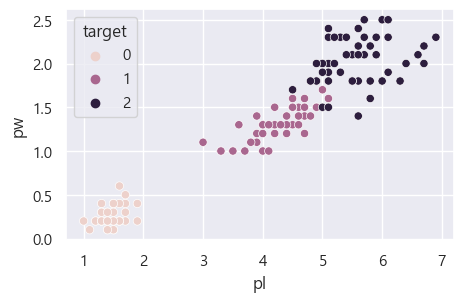

In [6]:
plt.figure(figsize=(5,3))
sns.scatterplot(x="pl", y="pw", data=df, hue="target")
plt.show()

In [7]:
kmeans = KMeans(n_clusters=3,  random_state=11)
kmeans.fit(X_train[['pl','pw']])    #--------- y가 없다
pred = kmeans.predict(X_test[['pl','pw']]) 
# pred_df = pd.DataFrame(pred, columns = ["pred"])
# pred_df['y'] = y_test.values
pred_df = pd.DataFrame({"pred_cluster_label":pred, "y":y_test})
pred_df[['pl','pw']] = X_test[['pl','pw']]
pred_df[pred_df["y"]==2].head()

,pred_cluster_label,y,pl,pw
121,0,2,4.9,2.0
122,0,2,6.7,2.0
105,0,2,6.6,2.1
115,0,2,5.3,2.3
137,0,2,5.5,1.8


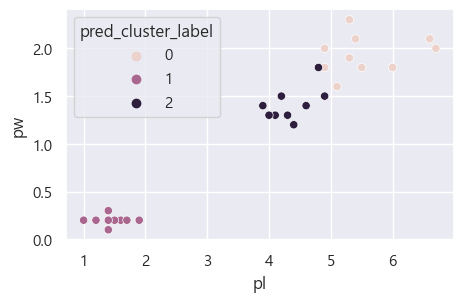

In [8]:
plt.figure(figsize=(5,3))
sns.scatterplot(x="pl", y="pw", data=pred_df, hue="pred_cluster_label")
plt.show()

In [9]:
kmeans = KMeans(n_clusters=3,  random_state=11)
kmeans.fit(X_train[['sl','sw']])    #--------- y가 없다
pred = kmeans.predict(X_test[['sl','sw']]) 
# pred_df = pd.DataFrame(pred, columns = ["pred"])
# pred_df['y'] = y_test.values
pred_df = pd.DataFrame({"pred_cluster_label":pred, "y":y_test})
pred_df[['sl','sw']] = X_test[['sl','sw']]
pred_df[pred_df["y"]==2].head()


,pred_cluster_label,y,sl,sw
121,0,2,5.6,2.8
122,1,2,7.7,2.8
105,1,2,7.6,3.0
115,1,2,6.4,3.2
137,1,2,6.4,3.1


## cluster_centers_
* 군집들의 클러스터헤더 좌표

In [10]:
kmeans.cluster_centers_

array([[5.76585366, 2.65853659],
       [6.78717949, 3.08461538],
       [5.        , 3.425     ]])

## labels_
* 군집 라벨

In [11]:
print(kmeans.labels_)
X_train['cluster_label'] = kmeans.labels_
X_test['cluster_label']  = pred

[2 0 2 1 1 2 0 2 2 0 2 1 0 0 2 2 1 1 0 0 2 0 1 1 0 2 2 0 0 0 1 0 1 2 2 1 2
 1 2 1 0 0 0 0 2 0 0 1 0 1 1 2 0 2 1 2 1 2 1 0 1 0 0 1 2 1 1 0 1 0 0 1 0 1
 2 1 2 2 1 0 0 0 2 1 1 2 1 0 2 2 2 1 0 1 1 1 1 2 2 2 1 0 0 0 2 0 0 0 0 2 2
 1 2 2 2 2 0 1 2 1]


## <font color=red><b> 실루엣 계수(Silhouette Coefficient)
* 군집이 얼마나 잘 되었는지를 평가하는 지표
* 군집내에서는 응집도가 좋아야 하고, 다른 군집과는 분리가 잘 되어 이었야 한다. <br><br> 
* $ { coef = \frac{(b - a)} {max(a, b)} }$
    * a : 군집내에서 헤더와의 평균 거리 (작으면 응집도가 좋다)
    * b : 주변의 가장 가까운 군집과 헤더와의 평균 거리(다른 군집과 분리가 잘되있다)

### silhouette_samples()
* <b>모든 데이터들</b>의 실루엣 계수(Silhouette Coefficient)를 반환
* -1(worst) ~ 1(best) 값, 0(두개의 클러스터에 중첩)

In [12]:
from sklearn.metrics import silhouette_samples
train_coef = silhouette_samples(X_train[['sl','sw']], kmeans.labels_, metric='euclidean')
test_coef  = silhouette_samples(X_test[['sl','sw']] , pred, metric='euclidean')
print(train_coef[:5], test_coef[:5])

X_train['sil_coef'] = train_coef
X_test['sil_coef']  = test_coef
X_train.head()

[0.28799288 0.62752383 0.61577075 0.44924986 0.42347725] [0.63652177 0.17027261 0.62174174 0.57983326 0.65483061]


,sl,sw,pl,pw,cluster_label,sil_coef
15,5.7,4.4,1.5,0.4,2,0.287993
79,5.7,2.6,3.5,1.0,0,0.627524
4,5.0,3.6,1.4,0.2,2,0.615771
117,7.7,3.8,6.7,2.2,1,0.449250
118,7.7,2.6,6.9,2.3,1,0.423477


### silhouette_score()
* 실루엣 계수(Silhouette Coefficient)의 <b>평균값</b>
* <b>np.mean(  silhouette_samples ()  ) </b>

In [13]:
from sklearn.metrics import silhouette_score
train_coef_mean = silhouette_score(X_train[['sl','sw']], kmeans.labels_, metric='euclidean')
test_coef_mean  = silhouette_score(X_test[['sl','sw']] , pred, metric='euclidean')
print(train_coef_mean, test_coef_mean)


0.4436794159785156 0.44225760468215164


In [14]:
X_train['sil_coef'].mean(), X_test['sil_coef'].mean()

(0.4436794159785156, 0.44225760468215164)

In [15]:
X_train.groupby('cluster_label')['sil_coef'].mean()

cluster_label
0    0.385378
1    0.463998
2    0.483627
Name: sil_coef, dtype: float64

In [16]:
X_test.groupby('cluster_label')['sil_coef'].mean()

cluster_label
0    0.477535
1    0.323734
2    0.494744
Name: sil_coef, dtype: float64

### inertia_ 
* 클러스터 센터와 해당 군집에 속한 데이터들 간의 <b>거리 제곱 합</b>
* 클러스터 내에서의 <b>응집도</b> 평가
* 크면 클수록 응집도가 약하다

In [17]:
kmeans.inertia_
print(f"응집도 : {kmeans.inertia_:.4f}") 

응집도 : 31.0811


## 최적의 K 찾기
* <font color=red><b>inertia를 사용한 엘보차트로 확인

In [18]:
n_clusters_list = [2,3,4,5]
inertia_list = []
for k in n_clusters_list:
    kmeans = KMeans(n_clusters=k,  random_state=11) # ---- n_clusters=k
    kmeans.fit(X_train[['pl','pw']])                # ---- y가 없다
    pred = kmeans.predict(X_test[['pl','pw']]) 
    pred_df = pd.DataFrame({"pred_cluster_label":pred, "y":y_test})
    pred_df[['pl','pw']] = X_test[['pl','pw']]

    #X_train['sil_coef'] = silhouette_samples(X_train[['sl','sw']], kmeans.labels_, metric='euclidean')
    train_coef_mean = silhouette_score(X_train[['pl','pw']], kmeans.labels_, metric='euclidean')
    print(f"{k} 실루엣점수: {train_coef_mean:.4f}")
    
    #print(kmeans.cluster_centers_)
    
    inertia_list.append([k, kmeans.inertia_] )
print(inertia_list)    

2 실루엣점수: 0.7584
3 실루엣점수: 0.6668
4 실루엣점수: 0.6334
5 실루엣점수: 0.6019
[[2, 71.05743748070392], [3, 25.034919799498773], [4, 14.809459073493557], [5, 10.804202135774217]]


In [19]:
temp_df = pd.DataFrame(inertia_list, columns=["k", "inertia"])
temp_df.head()

,k,inertia
0,2,71.057437
1,3,25.034920
2,4,14.809459
3,5,10.804202


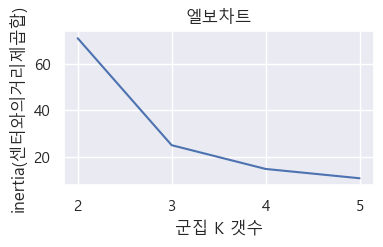

In [20]:
plt.figure(figsize=(4,2))
plt.plot(temp_df["k"], temp_df["inertia"])
plt.title("엘보차트")
plt.xlabel("군집 K 갯수")
plt.ylabel("inertia(센터와의거리제곱합)")
plt.show()

# 평가 시각화

* ref : https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

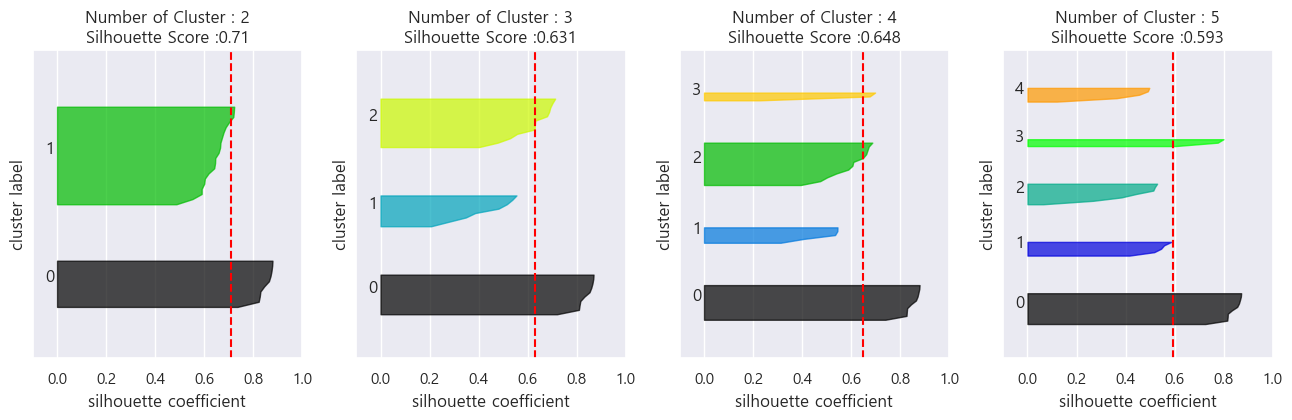

In [21]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

    
def my_chart(cluster_lists, X): 
    
    fig, axs = plt.subplots(figsize=(4*len(cluster_lists), 4), 
                            nrows=1, 
                            ncols=len(cluster_lists))

    for ind, k in enumerate(cluster_lists):
        
        kmeans = KMeans(n_clusters = k , 
                           max_iter=500, random_state=0)
        cluster_labels = kmeans.fit_predict(X)

        sil_coef_mean = silhouette_score(X, cluster_labels)
        sil_coef      = silhouette_samples(X, cluster_labels)
        
        X['pred_cluster_label'] = cluster_labels
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(k)+'\n' \
                          'Silhouette Score :' + str(round(sil_coef_mean,3)) )
        axs[ind].set_xlabel("silhouette coefficient")
        axs[ind].set_ylabel("cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X) + (k + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 막대 그래프
        for i in range(k):
            ith_cluster_sil_coef = sil_coef[cluster_labels==i]
            ith_cluster_sil_coef.sort()

            size_cluster_i = ith_cluster_sil_coef.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / k)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_coef, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_coef_mean, color="red", linestyle="--")
my_chart([2,3,4,5], X_test)

For n_clusters = 2 The average silhouette_score is : 0.7583692207152315
For n_clusters = 3 The average silhouette_score is : 0.6668069630287282
For n_clusters = 4 The average silhouette_score is : 0.6334496863112897
For n_clusters = 5 The average silhouette_score is : 0.6004316636907646


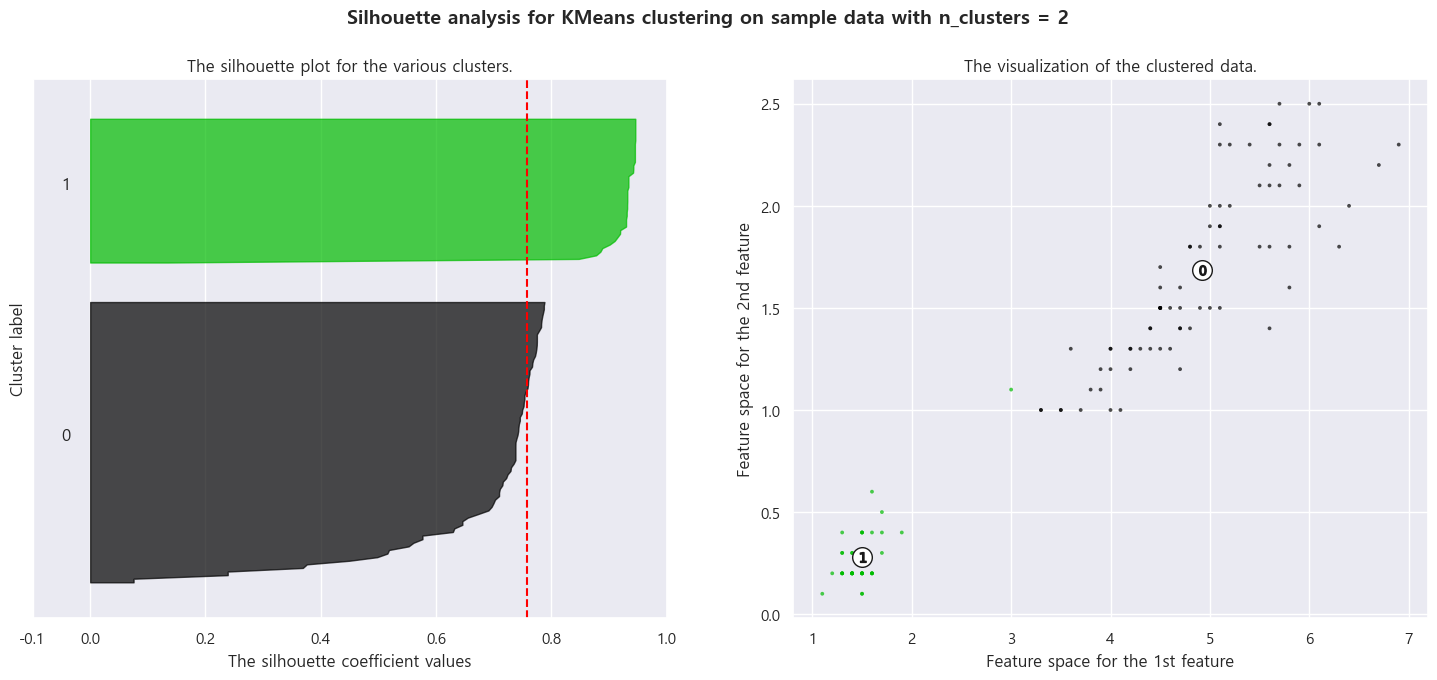

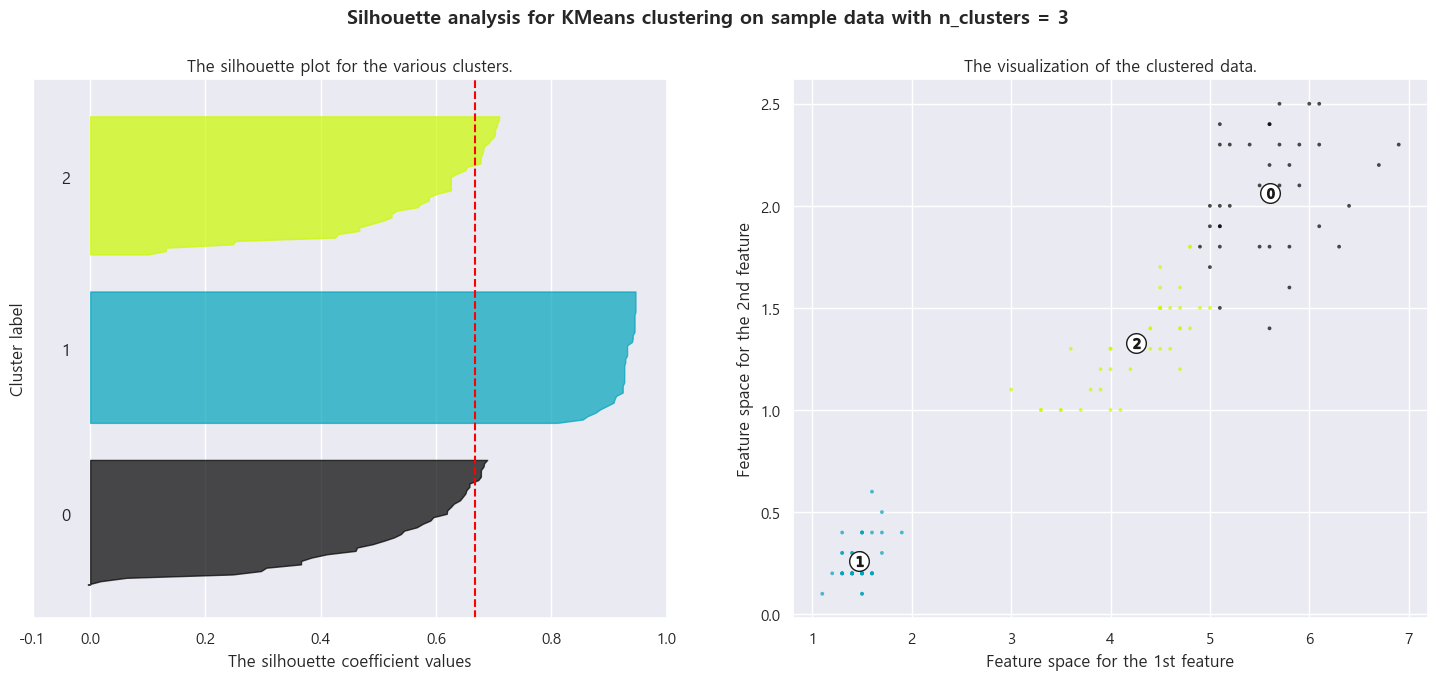

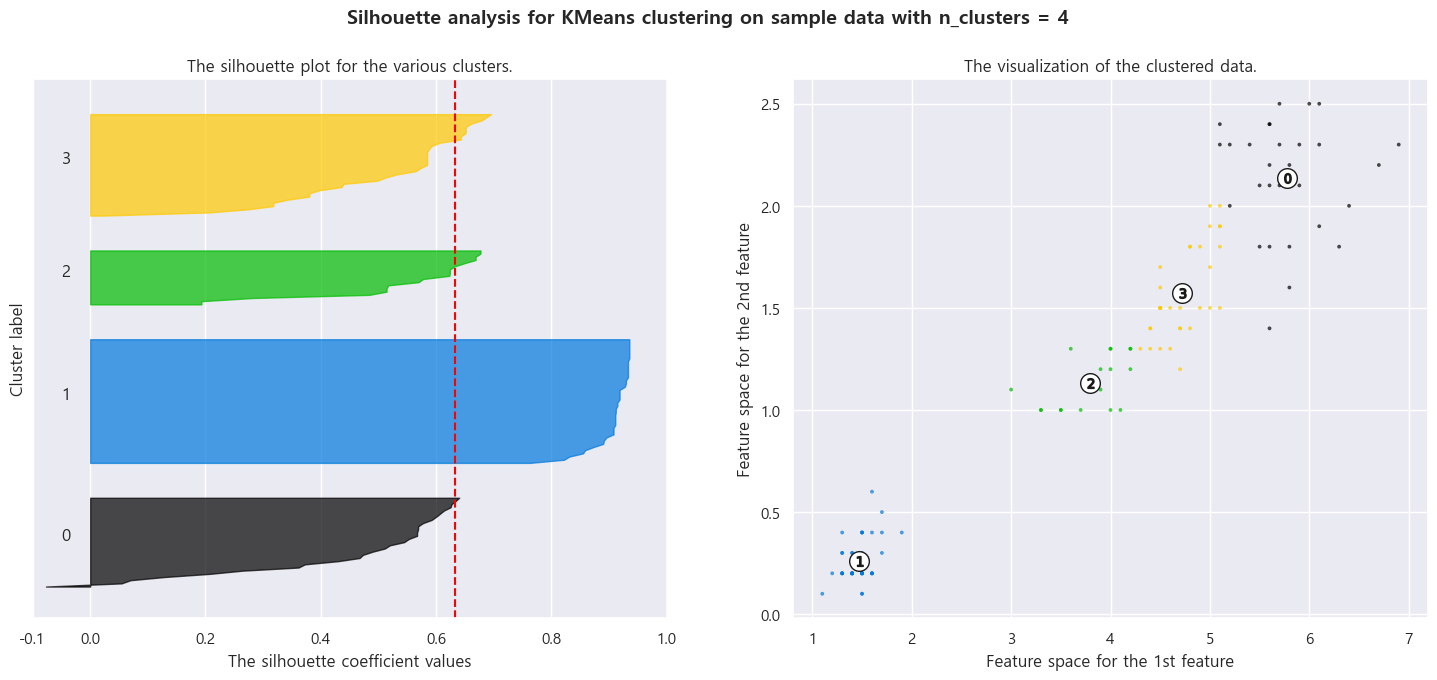

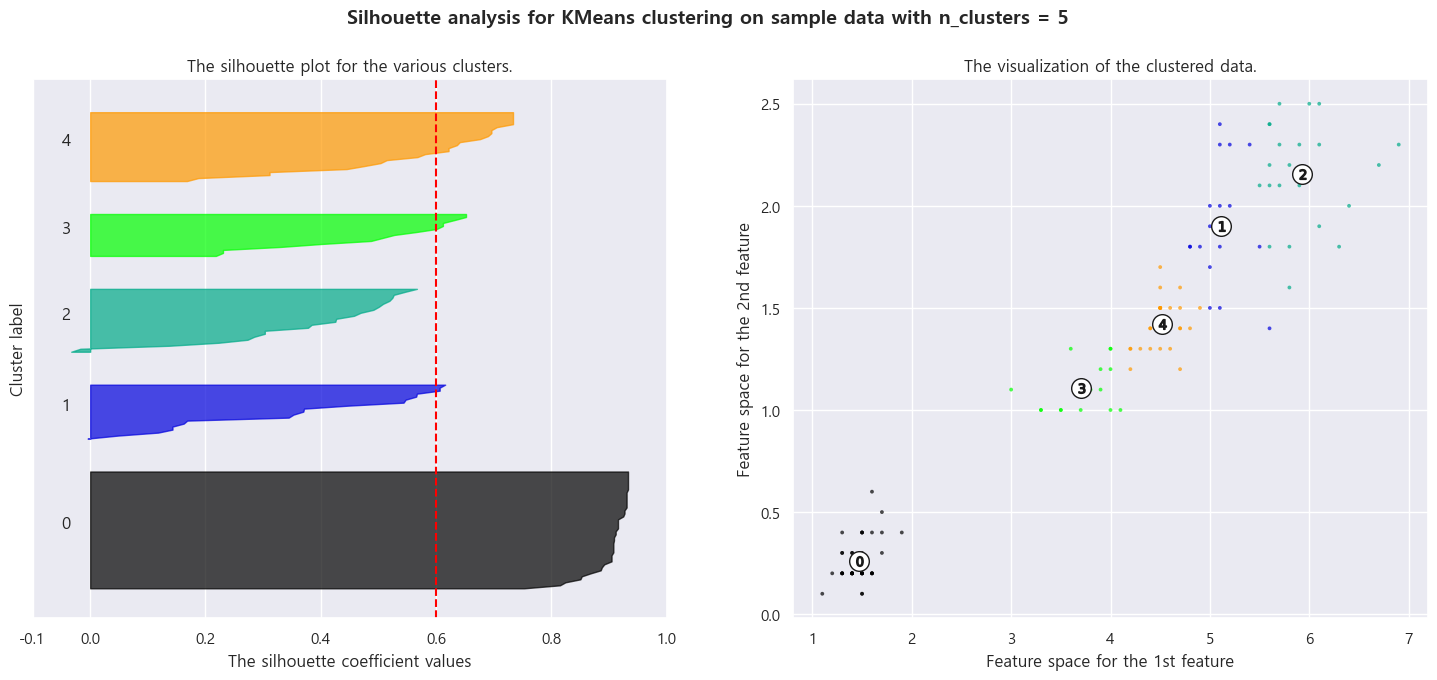

In [22]:
X = X_train[['pl','pw']]
for n_clusters in [2,3,4,5]:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters,  random_state=10)
    cluster_labels = kmeans.fit_predict(X)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

# DBSCAN
* DBSCAN (Density-based spatial clustering of applications with noise)
* <b>밀도</b>가 높은 부분을 중심으로 클러스터링을 하는 방식
* 반경(Eps) 내에 점이 n개 이상(MinPts) 있으면 군집화

<img width=400 src="https://lucy-the-marketer.kr/wp-content/uploads/2020/10/image-29.png">

* Core Point 
    * 반경(Eps)내에 최소 데이터수(MinPts)를 만족
* Border Point (MinPtsX, coreO)
    * 반경(Eps)내에 최소 데이터수(MinPts)를 만족하지 못함
    * 반경(Eps)내에 데이터에 Core Point가 있는 경우
* Noise Point (MinPtsX, coreX)
    * 반경(Eps)내에 최소 데이터수(MinPts)를 만족하지 못함
    * 반경(Eps)내에 데이터에 Core Point도 없다

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdMxBgo%2FbtrAtLgV5Xk%2FBusyALKYOEMqkL4MI0lkJ1%2Fimg.png">

<pre>
<b>class sklearn.cluster.DBSCAN(eps=0.5, min_samples=5,</b> 
                                metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)


In [23]:
from sklearn.cluster import DBSCAN

#kmeans = KMeans(n_clusters = k , max_iter=500, random_state=0)
dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_labels = dbscan.fit_predict(X)

sil_coef_mean = silhouette_score(X, cluster_labels)
sil_coef      = silhouette_samples(X, cluster_labels)

print(f"{sil_coef_mean:.4f}")

0.5471


In [24]:
eps_list = [0.3,0.5,0.7]
min_samples_list = [3,5,7]

for eps in eps_list:
    for min_samples in min_samples_list:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X)

        sil_coef_mean = silhouette_score(X, cluster_labels)
        sil_coef      = silhouette_samples(X, cluster_labels)

        print(f"{eps} {min_samples} {sil_coef_mean:.4f}")

0.3 3 0.3336
0.3 5 0.4898
0.3 7 0.5499
0.5 3 0.7605
0.5 5 0.5471
0.5 7 0.5523
0.7 3 0.7605
0.7 5 0.7605
0.7 7 0.7605


## 최적의 eps, min_samples 찾기
* <font color=red><b>유클리드 거리 활용

In [25]:
def my_find_eps(X, k):
    k_list = []
    for i in range(len(X)) :
        uc_distance_list = []
        for j in range(len(X)) :
            uc_distance = np.sqrt ( (X.iloc[i,0] - X.iloc[j,0])**2  +  (X.iloc[i,1] - X.iloc[j,1])**2 )
            uc_distance_list.append(uc_distance)
        #uc_distance_list.sort()
        k_list.append( uc_distance_list[k]  )    
    return k_list

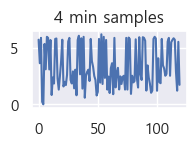

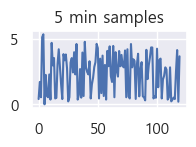

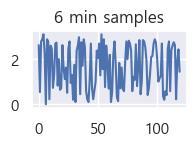

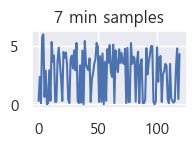

In [26]:
k_list = [4,5,6,7]
for n in k_list:
    res = my_find_eps(X, n)
    #print(res)
    plt.figure(figsize=(2,1))
    plt.title(f"{n} min samples")
    plt.plot(res)
    plt.show()

<img src="https://lucy-the-marketer.kr/wp-content/uploads/2020/10/image-32.png">

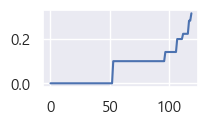

In [27]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=5, radius=1.0)
res = nn.fit(X)
# kneighbors([X, n_neighbors, return_distance])
dist, idx = res.kneighbors()
dist = np.sort(dist, axis=0)
plt.figure(figsize=(2,1))
plt.plot(dist[:, 0])
plt.show()

# HIRACHY
* 단일기준결합방식 (single)   : 각 군집에서 중심으로부터 거리가 가까운 점과의 거리 계산
* 완전기준결합방식 (complete) : 각 군집에서 중심으로부터 가장 먼 점과의 거리 계산
* 평균기준결합방식 (average)  : 한 군집과 다른 군집에 속해 있는 모든 점과의 거리 계산단일

<img width=400 src="https://drek4537l1klr.cloudfront.net/rhys/v-7/Figures/CH17_FIG_3_MLR.png">

<pre>
최단 : <img src="https://lucy-the-marketer.kr/wp-content/uploads/2020/10/image-33.png" width=300>
최장 : <img src="https://lucy-the-marketer.kr/wp-content/uploads/2020/10/image-34.png" width=300>
평균 : <img src="https://lucy-the-marketer.kr/wp-content/uploads/2020/10/image-35-768x341.png" width=300>

In [28]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree, fcluster 

<pre>scipy.cluster.hierarchy.linkage(y, method='single', metric='euclidean', optimal_ordering=False)

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("./datasets/iris.csv")
y = df['target']
X = df.drop(['target'], axis=1)

pca = PCA(n_components=2, random_state=1234)
X_pca = pca.fit_transform(X)

# scaler = StandardScaler()
# X_pca_scaler = scaler.fit_transform(X_pca)
# pca_df = pd.DataFrame(X_pca_scaler) #, columns=["pc1","pc2"])

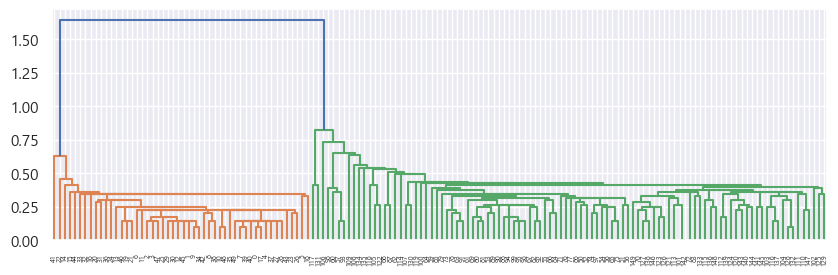

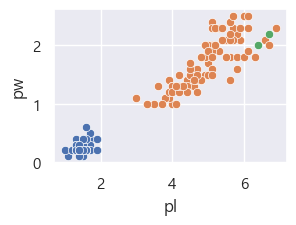

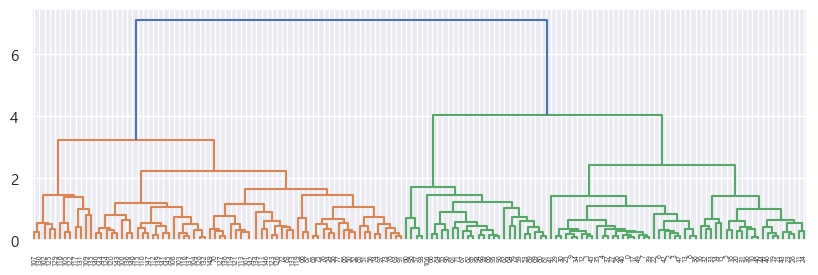

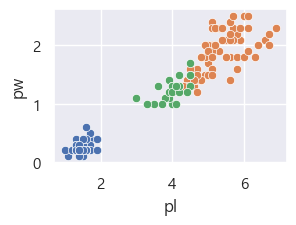

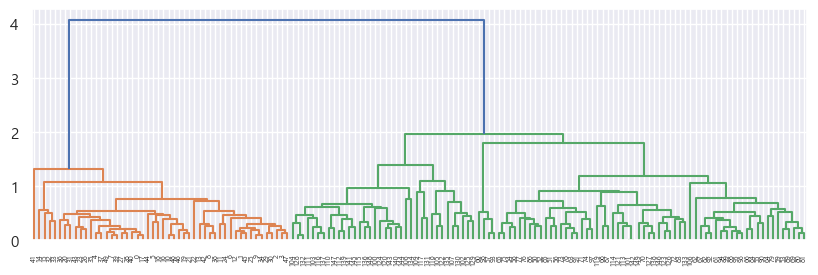

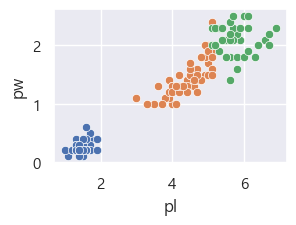

In [30]:
df = pd.read_csv("./datasets/iris.csv")
y = df['target']
X = df.drop(['target'], axis=1)

method_list = ['complete']  
method_list = ['single', 'complete', 'average']
for method in method_list:
    dist = linkage(X, method=method)
    
    plt.figure(figsize=(10,3))
    dendrogram(dist)
    plt.show()
    
    # 클러스터 결과 시각화
    num_cluster = 3
    cluster_label = cut_tree(dist, num_cluster).reshape(len(X)) # 데이터별 클러스터 반환
    #print(cluster_label)
    
    cluster_df_list = []
    for i in range(num_cluster):
        cluster_df_list.append(X.loc[np.where(cluster_label==i)])
    # print(cluster_df_list)
    
    fig = plt.figure(figsize=[3,2])
    for cdf in cluster_df_list:    
        #plt.scatter(cdf['pl'], cdf['pw'])
        sns.scatterplot(x="pl", y="pw", data=cdf) 

In [31]:
from scipy.cluster.hierarchy import fcluster

dist =  linkage(X,method='complete')
pred_df = pd.DataFrame(fcluster(dist,4, criterion='distance'), columns=["pred"])
print(pred_df.value_counts())
print("---"*20)
print(pred_df[pred_df["pred"]==1].index.values)
print(pred_df[pred_df["pred"]==2].index.values)
print(pred_df[pred_df["pred"]==3].index.values)
print("---"*20)
ct = pd.crosstab(pred_df['pred'],y)
print(ct)

pred
1       72
3       50
2       28
dtype: int64
------------------------------------------------------------
[ 50  51  52  54  56  58  63  65  68  70  72  73  74  75  76  77  78  83
  85  86  87  91  97 100 101 102 103 104 105 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
[ 53  55  57  59  60  61  62  64  66  67  69  71  79  80  81  82  84  88
  89  90  92  93  94  95  96  98  99 106]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
------------------------------------------------------------
target   0   1   2
pred              
1        0  23  49
2        0  27   1
3       50   0   0
